# EDA & Knowledge Graph with OpenAlex dataset

OpenAlex is a [fully open](license.md) catalog of the global research system available on [Registry of Open Data on AWS](https://registry.opendata.aws/openalex/). It's named after the [ancient Library of Alexandria](https://en.wikipedia.org/wiki/Library\_of\_Alexandria) and made by the nonprofit [OurResearch](https://ourresearch.org/).

OpenAlex sources are:

* [MAG](https://aka.ms/msracad)
* [Crossref.](https://www.crossref.org/)
* [ORCID](https://orcid.org/)
* [ROR](https://ror.org/)
* [DOAJ](https://doaj.org/)
* [Unpaywall](https://unpaywall.org/)
* [Pubmed](https://pubmed.ncbi.nlm.nih.gov/)
* [Pubmed Central](https://www.ncbi.nlm.nih.gov/pmc/)
* [The ISSN International Centre](https://www.issn.org/)
* [The General Index](https://archive.org/details/GeneralIndex)
* Web crawls
* Subject-area and institutional repositories from [arXiv](https://arxiv.org/) to [Zenodo](https://zenodo.org/) and everywhere in between


In this demonstration we are going to do exploratory data analysis, visualizing the main concepts and relation between works over time.

In [2]:
import requests

In [3]:
openalex_api = "https://api.openalex.org/"

In OpenAlex a **concept** tag Works with a topic. There are 19 root-level concepts, and six layers of descendents branching out from them, containing about 65 thousand concepts all told.

In [4]:
# root-level concepts (level 0)
main_concepts = requests.get(openalex_api+"concepts?filter=level:0").json()
display(main_concepts['meta']['count'])

19

In [5]:
import numpy as np
import pandas as pd

In [6]:
df_main_concepts = pd.DataFrame(main_concepts['results'])
df_main_concepts.head()

,id,wikidata,display_name,level,description,works_count,cited_by_count,ids,image_url,image_thumbnail_url,international,ancestors,related_concepts,counts_by_year,works_api_url,updated_date,created_date
0,https://openalex.org/C41008148,https://www.wikidata.org/wiki/Q21198,Computer science,0,theoretical study of the formal foundation ena...,76576650,391428928,"{'openalex': 'https://openalex.org/C41008148',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,"{'display_name': {'af': 'Informatika', 'am': '...",[],"[{'id': 'https://openalex.org/C33923547', 'wik...","[{'year': 2022, 'works_count': 2095845, 'cited...",https://api.openalex.org/works?filter=concepts...,2022-11-29T07:48:02.454438,2016-06-24
1,https://openalex.org/C71924100,https://www.wikidata.org/wiki/Q11190,Medicine,0,"field of study for diagnosing, treating and pr...",57546767,578856619,"{'openalex': 'https://openalex.org/C71924100',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,"{'display_name': {'aeb-arab': 'طب', 'af': 'gen...",[],"[{'id': 'https://openalex.org/C141071460', 'wi...","[{'year': 2022, 'works_count': 1922945, 'cited...",https://api.openalex.org/works?filter=concepts...,2022-11-29T07:45:04.570953,2016-06-24
2,https://openalex.org/C86803240,https://www.wikidata.org/wiki/Q420,Biology,0,branch of science that primarily deals with st...,41651980,633890873,"{'openalex': 'https://openalex.org/C86803240',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,"{'display_name': {'ab': 'абиологиа', 'af': 'bi...",[],"[{'id': 'https://openalex.org/C185592680', 'wi...","[{'year': 2022, 'works_count': 1433436, 'cited...",https://api.openalex.org/works?filter=concepts...,2022-11-29T07:38:56.800784,2016-06-24
3,https://openalex.org/C121332964,https://www.wikidata.org/wiki/Q413,Physics,0,"study of matter and its motion, along with rel...",38247027,394604397,{'openalex': 'https://openalex.org/C121332964'...,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,"{'display_name': {'ace': 'Fisika', 'af': 'fisi...",[],"[{'id': 'https://openalex.org/C33923547', 'wik...","[{'year': 2022, 'works_count': 1122031, 'cited...",https://api.openalex.org/works?filter=concepts...,2022-11-29T07:43:59.485787,2016-06-24
4,https://openalex.org/C17744445,https://www.wikidata.org/wiki/Q36442,Political science,0,social science concerned with the study of pol...,33755393,118417052,"{'openalex': 'https://openalex.org/C17744445',...",None,None,"{'display_name': {'af': 'politieke wetenskap',...",[],"[{'id': 'https://openalex.org/C144024400', 'wi...","[{'year': 2022, 'works_count': 814310, 'cited_...",https://api.openalex.org/works?filter=concepts...,2022-11-29T07:37:24.517166,2016-06-24


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

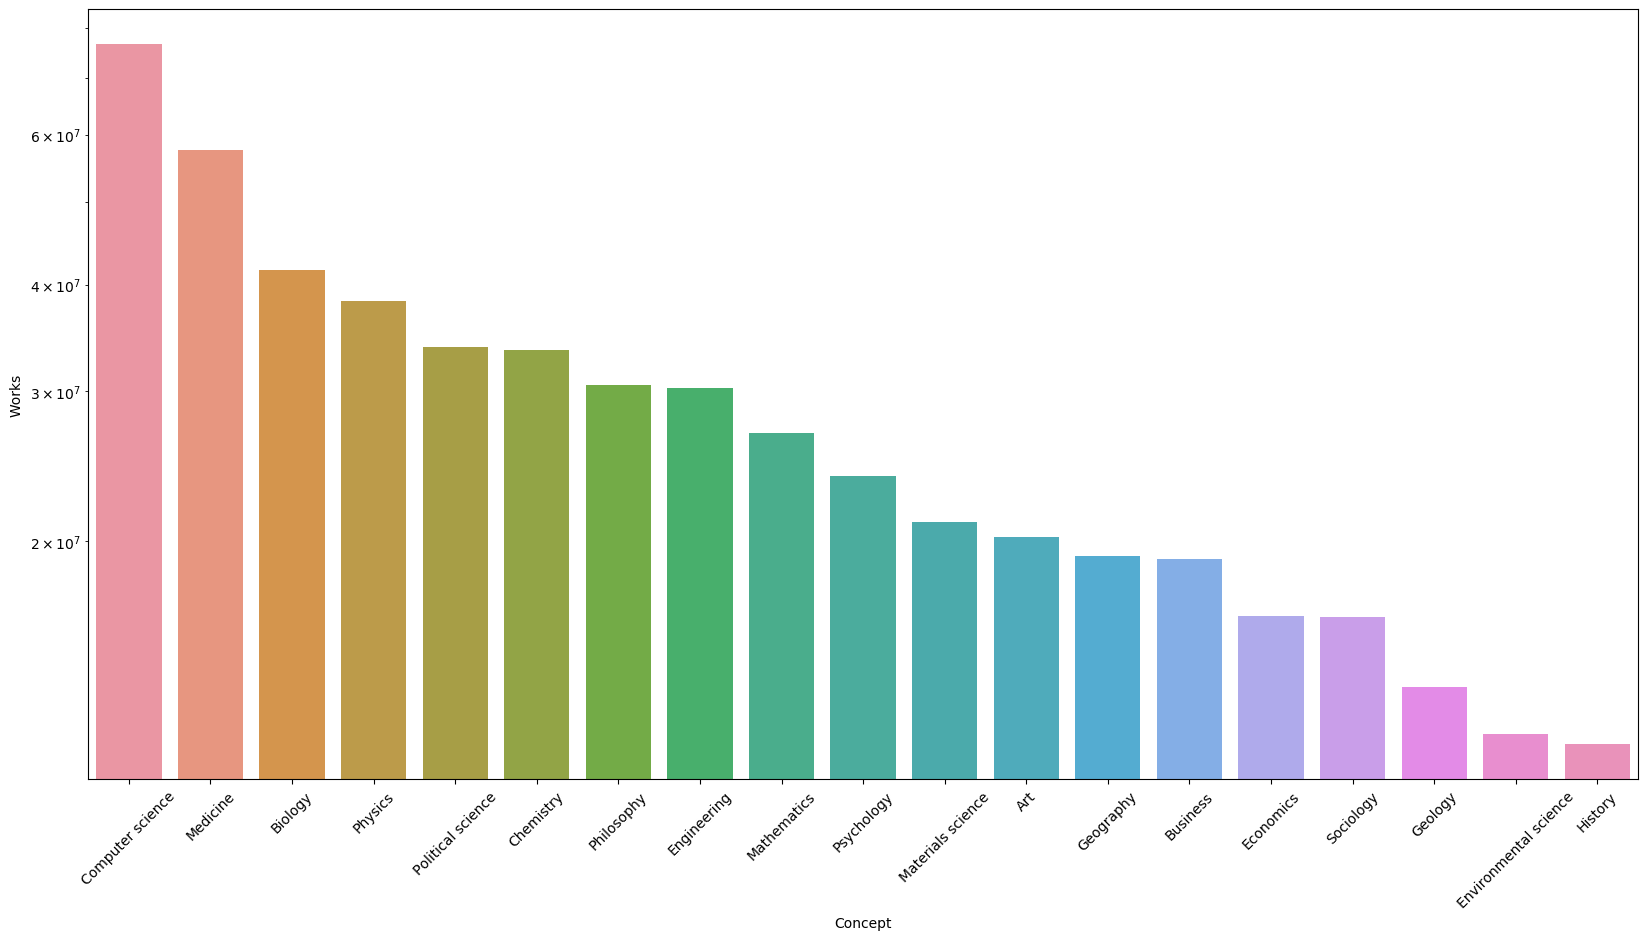

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x='display_name', y='works_count', data=df_main_concepts)
plt.yscale("log")
plt.xticks(plt.xticks()[0], rotation=45)
plt.xlabel('Concept')
plt.ylabel('Works')
plt.show()

Computer Science topic has the largest number of published works, with more than **70 millions**

In [9]:
computer_science = df_main_concepts.iloc[[0]]
computer_science

,id,wikidata,display_name,level,description,works_count,cited_by_count,ids,image_url,image_thumbnail_url,international,ancestors,related_concepts,counts_by_year,works_api_url,updated_date,created_date
0,https://openalex.org/C41008148,https://www.wikidata.org/wiki/Q21198,Computer science,0,theoretical study of the formal foundation ena...,76576650,391428928,"{'openalex': 'https://openalex.org/C41008148',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,"{'display_name': {'af': 'Informatika', 'am': '...",[],"[{'id': 'https://openalex.org/C33923547', 'wik...","[{'year': 2022, 'works_count': 2095845, 'cited...",https://api.openalex.org/works?filter=concepts...,2022-11-29T07:48:02.454438,2016-06-24


In [10]:
for i, concept in enumerate(computer_science['related_concepts'][0]):
    if concept['level'] > 0:
        print(concept['display_name'], concept['id'])

Electrical engineering https://openalex.org/C119599485
Mechanical engineering https://openalex.org/C78519656
Artificial intelligence https://openalex.org/C154945302
Algorithm https://openalex.org/C11413529
Civil engineering https://openalex.org/C147176958
Programming language https://openalex.org/C199360897
Electronic engineering https://openalex.org/C24326235
Computer engineering https://openalex.org/C113775141
Software engineering https://openalex.org/C115903868
Social science https://openalex.org/C36289849
Statistics https://openalex.org/C105795698
Applied mathematics https://openalex.org/C28826006
Theoretical computer science https://openalex.org/C80444323
Database https://openalex.org/C77088390
Machine learning https://openalex.org/C119857082
Management https://openalex.org/C187736073
Cognitive science https://openalex.org/C188147891
Humanities https://openalex.org/C15708023
Chemical engineering https://openalex.org/C42360764
Industrial engineering https://openalex.org/C13736549
B

Since computer science is a general concept, we are going to dive deep in Artificial Intelligence (AI).

In [11]:
artificial_intelligence_id = 'C154945302'

In [12]:
ai_concept = requests.get(openalex_api+'/concepts/'+artificial_intelligence_id).json()
display(ai_concept['works_count'])

13538455

There are more than 13 millions of works related to AI. To get all works we need to use the [cursor paging](https://docs.openalex.org/api#paging) or work with the [data snapshot](https://docs.openalex.org/download-snapshot/download-to-your-machine) available in the AWS Open Data program.

But, the API also has a pre-calculated count by year, enabling us to have a view of number of AI reasearch during the last 10 years.

In [13]:
df_ai_concept = pd.DataFrame(ai_concept['counts_by_year'])
df_ai_concept.head()

,year,works_count,cited_by_count
0,2022,590746,9464254
1,2021,842629,12527838
2,2020,784605,11212263
3,2019,723605,9496213
4,2018,660214,7980696


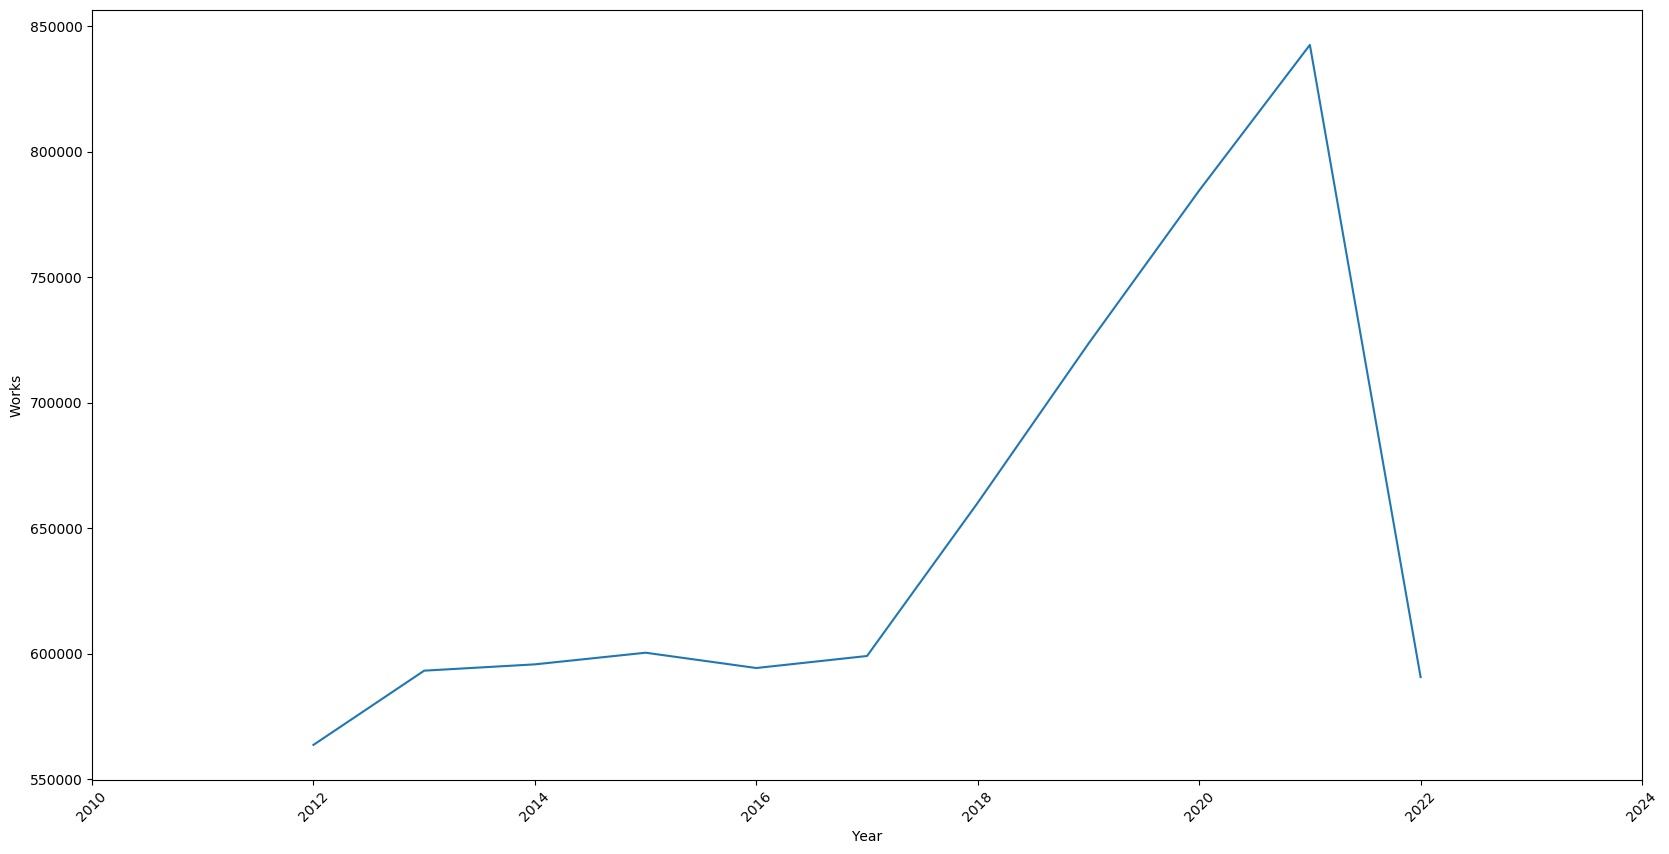

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='works_count', data=df_ai_concept)
plt.xticks(plt.xticks()[0], rotation=45)
plt.xlabel('Year')
plt.ylabel('Works')
plt.show()

There is an increase trought the years for research in AI topic. OpenAlex data is [updated montlhy](https://docs.openalex.org/faq).

At last, we can create knowledge graphs for related works in the topic of AI.

In [15]:
import networkx as nx
import plotly
import plotly.graph_objects as go
from plotly.offline import iplot

In [16]:
entity_filter = 'concepts.id:'
year_filter = 'publication_year:'
year = '2022'

# For demonstration purpose we are not going to do pagination
ai_works = requests.get(openalex_api+'works?filter='+entity_filter+artificial_intelligence_id+','+year_filter+year).json()
df_ai_works = pd.DataFrame(ai_works['results'])
df_ai_works.head()

,id,doi,title,display_name,publication_year,publication_date,ids,host_venue,type,open_access,...,mesh,alternate_host_venues,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date
0,https://openalex.org/W1509527650,None,Introducing Translation Studies: Theories and ...,Introducing Translation Studies: Theories and ...,2022,2022-02-08,{'openalex': 'https://openalex.org/W1509527650...,"{'id': None, 'issn_l': None, 'issn': None, 'di...",book,"{'is_oa': False, 'oa_status': None, 'oa_url': ...",...,[],"[{'id': None, 'display_name': None, 'type': No...",[],"[https://openalex.org/W603191964, https://open...",https://api.openalex.org/works/W1509527650/ngrams,"{'A': [0], 'visual': [1], 'tour': [2], 'of': [...",https://api.openalex.org/works?filter=cites:W1...,"[{'year': 2021, 'cited_by_count': 35}, {'year'...",2022-11-22T19:33:09.358042,2016-06-24
1,https://openalex.org/W4225529913,https://doi.org/10.1158/2159-8290.cd-21-1059,Hallmarks of Cancer: New Dimensions,Hallmarks of Cancer: New Dimensions,2022,2022-01-01,{'openalex': 'https://openalex.org/W4225529913...,"{'id': 'https://openalex.org/V2486275289', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'bronze', 'oa_url...",...,"[{'descriptor_ui': 'D057890', 'descriptor_name...","[{'id': 'https://openalex.org/V2486275289', 'd...","[https://openalex.org/W1965431780, https://ope...","[https://openalex.org/W117825662, https://open...",https://api.openalex.org/works/W4225529913/ngrams,"{'The': [0, 149], 'hallmarks': [1, 155], 'of':...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2022, 'cited_by_count': 706}]",2022-11-28T11:33:38.568884,2022-05-05
2,https://openalex.org/W2156094048,https://doi.org/10.1145/3501714.3501727,Reverend Bayes on Inference Engines: A Distrib...,Reverend Bayes on Inference Engines: A Distrib...,2022,2022-02-28,{'openalex': 'https://openalex.org/W2156094048...,"{'id': 'https://openalex.org/V4306462769', 'is...",book-chapter,"{'is_oa': False, 'oa_status': 'closed', 'oa_ur...",...,[],"[{'id': 'https://openalex.org/V4306462769', 'd...","[https://openalex.org/W188378287, https://open...","[https://openalex.org/W695875, https://openale...",https://api.openalex.org/works/W2156094048/ngrams,"{'This': [0], 'paper': [1], 'presents': [2], '...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 3}, {'year':...",2022-11-24T04:57:00.773086,2016-06-24
3,https://openalex.org/W3003265726,https://doi.org/10.1109/tnnls.2021.3070843,"A Survey on Knowledge Graphs: Representation, ...","A Survey on Knowledge Graphs: Representation, ...",2022,2022-02-01,{'openalex': 'https://openalex.org/W3003265726...,"{'id': 'https://openalex.org/V4210175523', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'green', 'oa_url'...",...,[],"[{'id': 'https://openalex.org/V4210175523', 'd...","[https://openalex.org/W68132019, https://opena...","[https://openalex.org/W1753267753, https://ope...",https://api.openalex.org/works/W3003265726/ngrams,"{'Human': [0], 'knowledge': [1, 39, 47, 52, 58...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2022, 'cited_by_count': 131}, {'year...",2022-11-28T06:46:10.075622,2020-02-07
4,https://openalex.org/W4226051885,https://doi.org/10.1109/tpami.2020.3008413,Event-Based Vision: A Survey,Event-Based Vision: A Survey,2022,2022-01-01,{'openalex': 'https://openalex.org/W4226051885...,"{'id': 'https://openalex.org/V199944782', 'iss...",journal-article,"{'is_oa': True, 'oa_status': 'hybrid', 'oa_url...",...,"[{'descriptor_ui': 'D000465', 'descriptor_name...","[{'id': 'https://openalex.org/V199944782', 'di...","[https://openalex.org/W116957824, https://open...","[https://openalex.org/W2002009170, https://ope...",https://api.openalex.org/works/W4226051885/ngrams,"{'Event': [0, 42], 'cameras': [1, 43, 87, 165]...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2022, 'cited_by_count': 104}, {'year...",2022-11-27T19:28:43.33774

In [17]:
import time

def create_graph(works, max_references=10):
    # TODO: recursive function with depth for references
    G = nx.Graph()

    for i, work in works.iterrows():
        G.add_node(work['title'])

        # get the references for the work limited by max_references
        for reference in work['referenced_works'][:max_references]:
            time.sleep(1)
            ref = requests.get(openalex_api+'works/'+reference.split(".org/",1)[1]).json()
            G.add_node(ref['title'])
            G.add_edge(work['title'], ref['title'])
    return G

In [ ]:
G = create_graph(df_ai_works)

In [ ]:
# defining positions of the nodes
pos = nx.spring_layout(G, k=0.5, iterations=50)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [ ]:
# adding nodes and edges to plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Work Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)
    )
)

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [ ]:
# coloring nodes
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [ ]:
# plotting
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='OpenAlex AI Knowledge Graph',
        titlefont=dict(size=16),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

iplot(fig)

We can see the relation between different works. To be able to have a better analysis and also do queries and interact with the graph you can take a look at [Amazon Neptune](https://aws.amazon.com/neptune/), making possible to utilize [Gremlin](https://tinkerpop.apache.org/gremlin.html) to query your graph.